In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')

In [3]:
print(df.isnull().sum())
df = df.fillna(df.mean())
print("DataFrame with missing values replaced by mean:")
print(df.isnull().sum())
df.describe()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
DataFrame with missing values replaced by mean:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.to_csv("transformed_dataset.csv", index=False)

In [5]:
# Features (X) are all columns except 'MEDV', which is the target variable (y)
X = df.drop(columns=['MEDV'])  # Features
y = df['MEDV']  # Target variable

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [7]:
# Make predictions
predictions = linear_model.predict(X)

R-squared: 0.7314104821117173
Mean Squared Error: 22.674207888327313


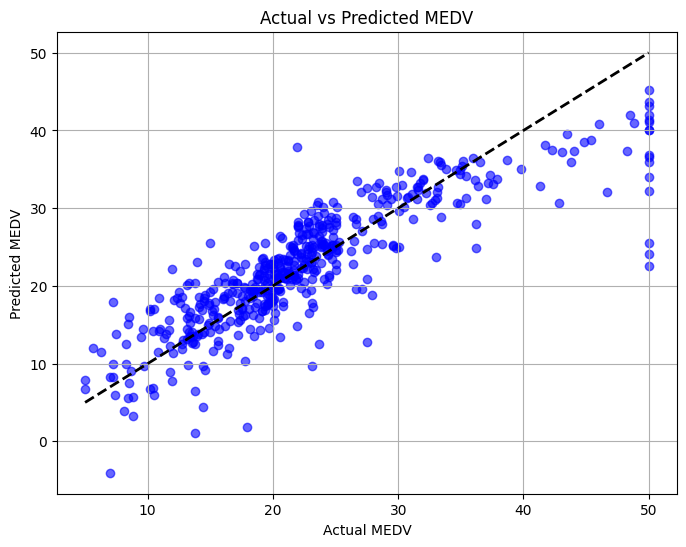

In [8]:
# Calculate R-squared and mean squared error
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the best-fit line
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.grid(True)
plt.show()

In [9]:
import pickle
#extracting the model file
with open(f"Linear_Regression_boston-housing-dataset","wb") as f:
    pickle.dump(linear_model,f)